# Telco Customer Churn - Exploratory Data Analysis

This notebook provides an exploratory data analysis of the Telco Customer Churn dataset


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from src.config import INTERIM_DATA_DIR
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Set unified color palette and styling
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Define unified color palette
COLORS = {
    'primary': '#2E86AB',    
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#C73E1D',
    'neutral': '#4A5568',
    'light': '#E2E8F0',
    'retained': '#48BB78',
    'churned': '#E53E3E'      
}

# Set seaborn palette
custom_palette = [COLORS['primary'], COLORS['secondary'], COLORS['accent'], 
                 COLORS['success'], COLORS['neutral'], COLORS['retained']]
sns.set_palette(custom_palette)

# Set default figure parameters
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [202]:
df = pd.read_csv(f'{INTERIM_DATA_DIR}/telco_customer_churn.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7043, 21)


,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Target Variable Analysis


In [186]:
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
for value, count, pct in zip(churn_counts.index, churn_counts.values, churn_percentages.values):
    print(f"{value}: {count:,} customers ({pct:.1f}%)")

Churn Distribution:
No: 5,174 customers (73.5%)
Yes: 1,869 customers (26.5%)


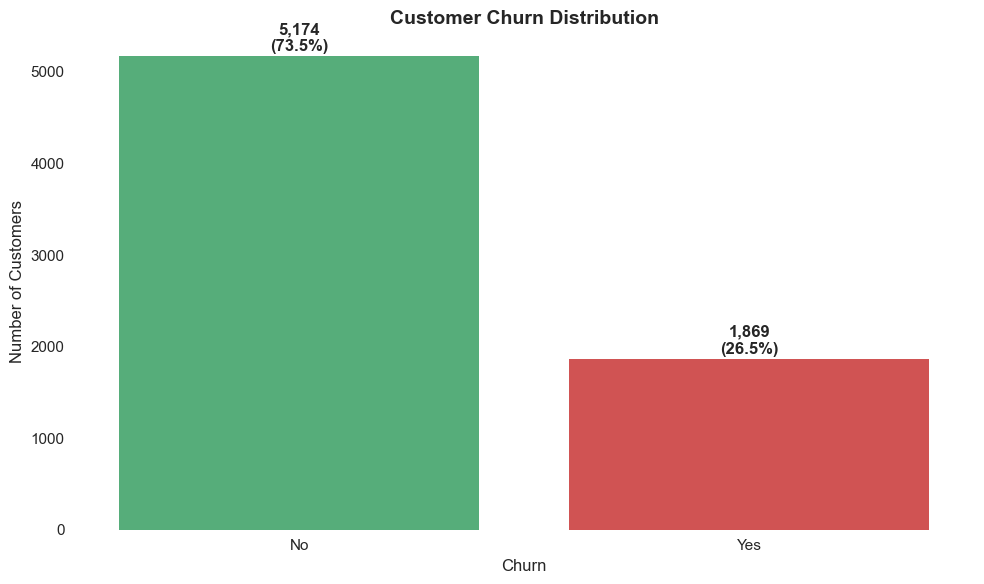

In [187]:
# Visualize churn distribution - Count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', palette=[COLORS['retained'], COLORS['churned']])
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Customers')
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 50, f'{v:,}\n({churn_percentages.values[i]:.1f}%)', 
             ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## 2. Demographic Analysis


<Figure size 1000x600 with 0 Axes>

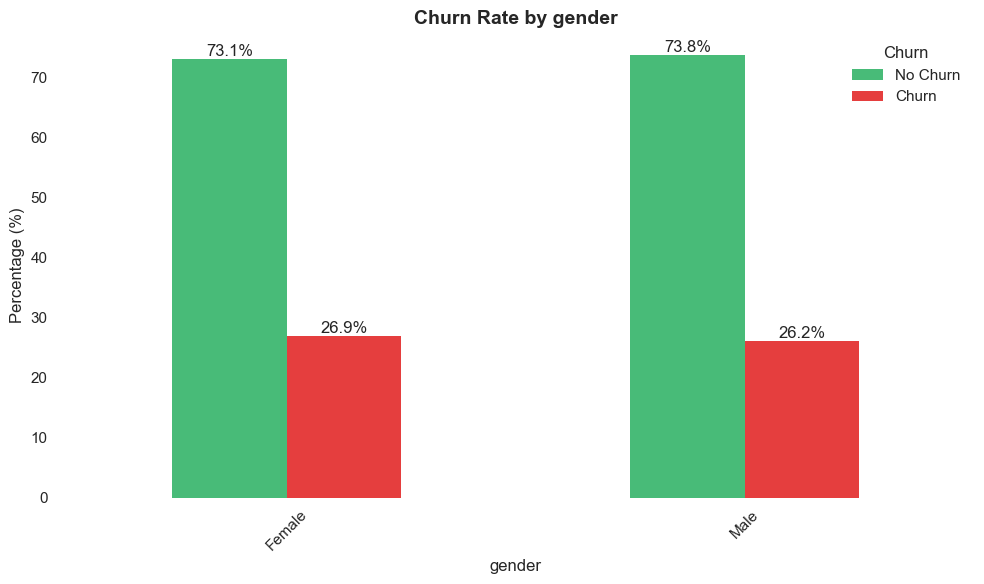

<Figure size 1000x600 with 0 Axes>

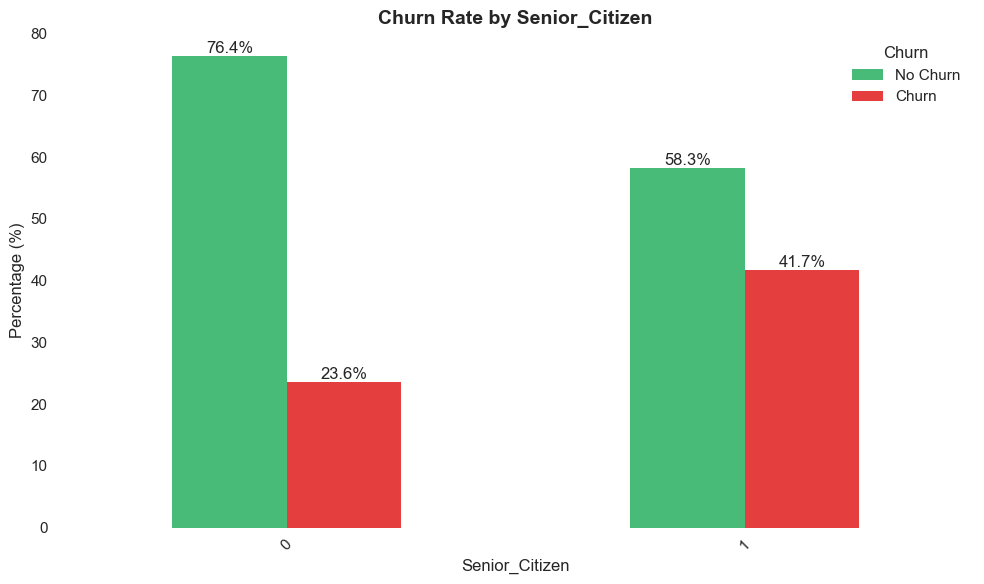

<Figure size 1000x600 with 0 Axes>

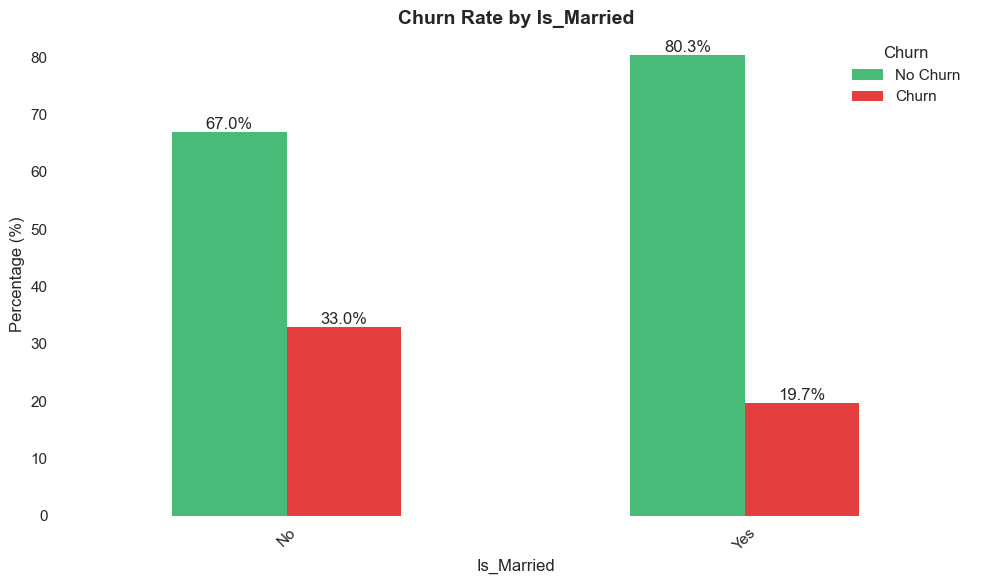

<Figure size 1000x600 with 0 Axes>

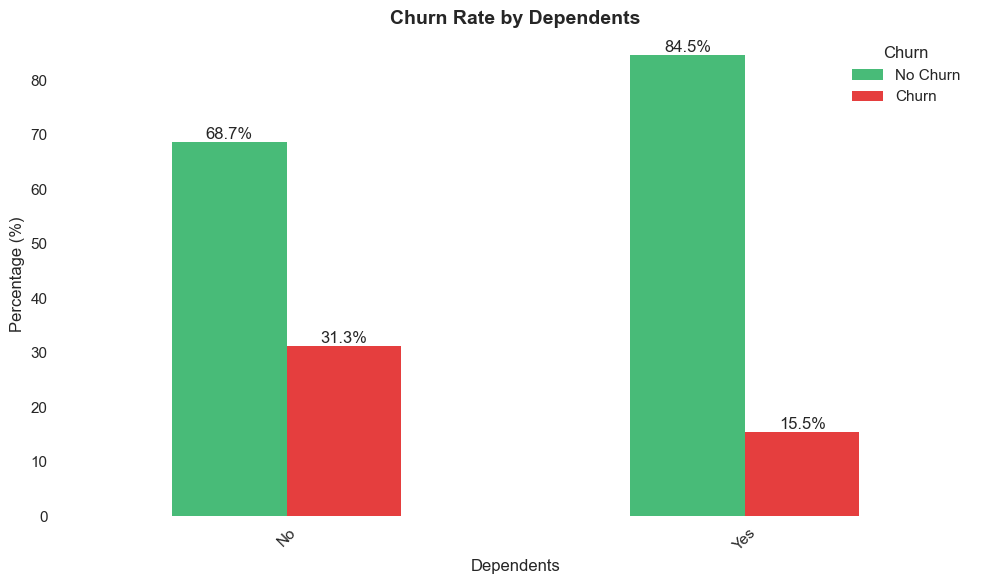


Churn rates by demographic segments:

gender:
  Female: 26.9%
  Male: 26.2%

Senior_Citizen:
  0: 23.6%
  1: 41.7%

Is_Married:
  No: 33.0%
  Yes: 19.7%

Dependents:
  No: 31.3%
  Yes: 15.5%


In [188]:
# Demographic features analysis
demographic_cols = ['gender', 'Senior_Citizen', 'Is_Married', 'Dependents']

for col in demographic_cols:
    crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    
    plt.figure(figsize=(10, 6))
    ax = crosstab.plot(kind='bar', color=[COLORS['retained'], COLORS['churned']], figsize=(10, 6))
    plt.title(f'Churn Rate by {col}', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.xticks(rotation=45)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')
    
    plt.tight_layout()
    plt.show()

# Print statistical summary
print("\nChurn rates by demographic segments:")
for col in demographic_cols:
    print(f"\n{col}:")
    churn_by_demo = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    for category, rate in churn_by_demo.items():
        print(f"  {category}: {rate:.1f}%")

## 3. Service Usage Analysis


<Figure size 1000x600 with 0 Axes>

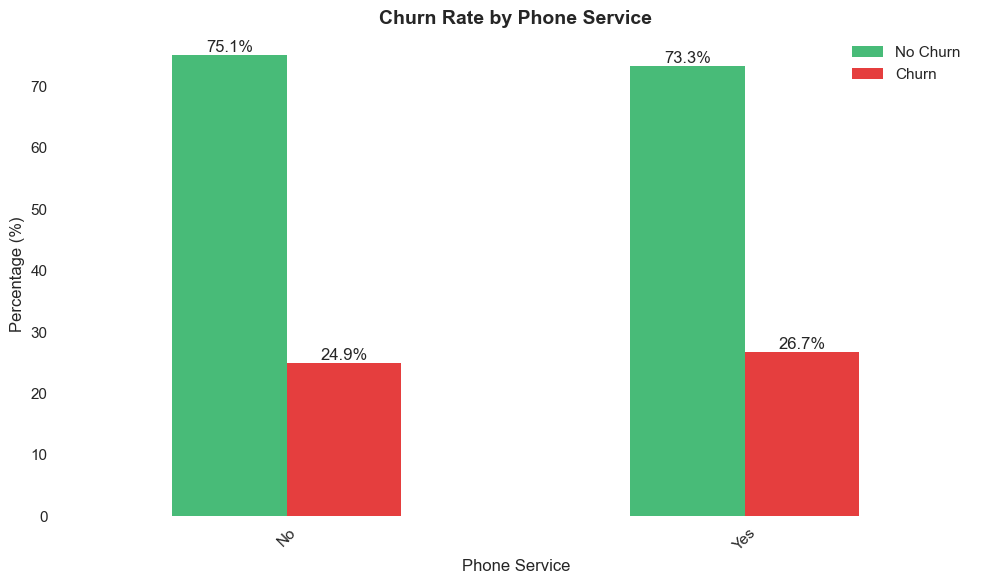

<Figure size 1000x600 with 0 Axes>

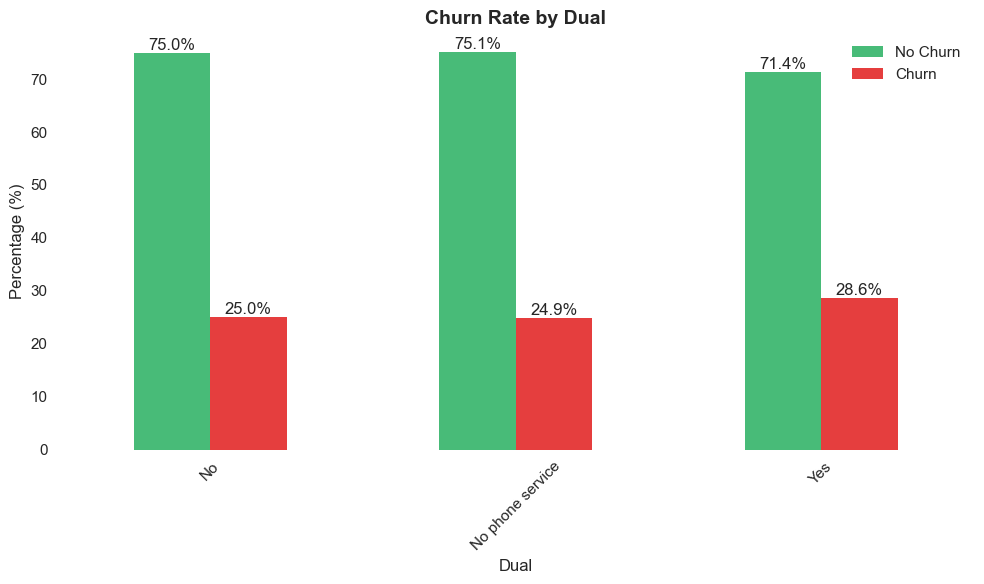

<Figure size 1000x600 with 0 Axes>

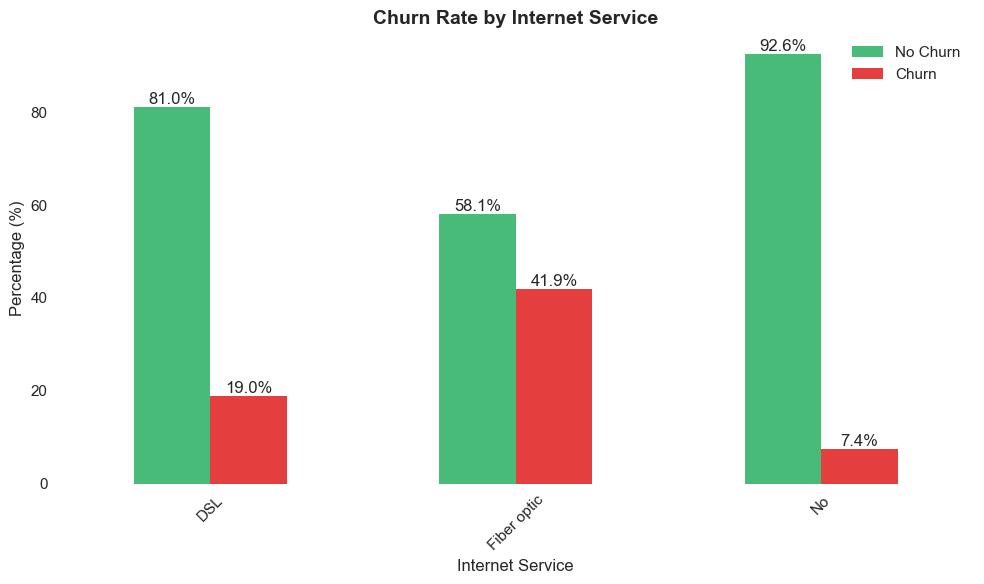

<Figure size 1000x600 with 0 Axes>

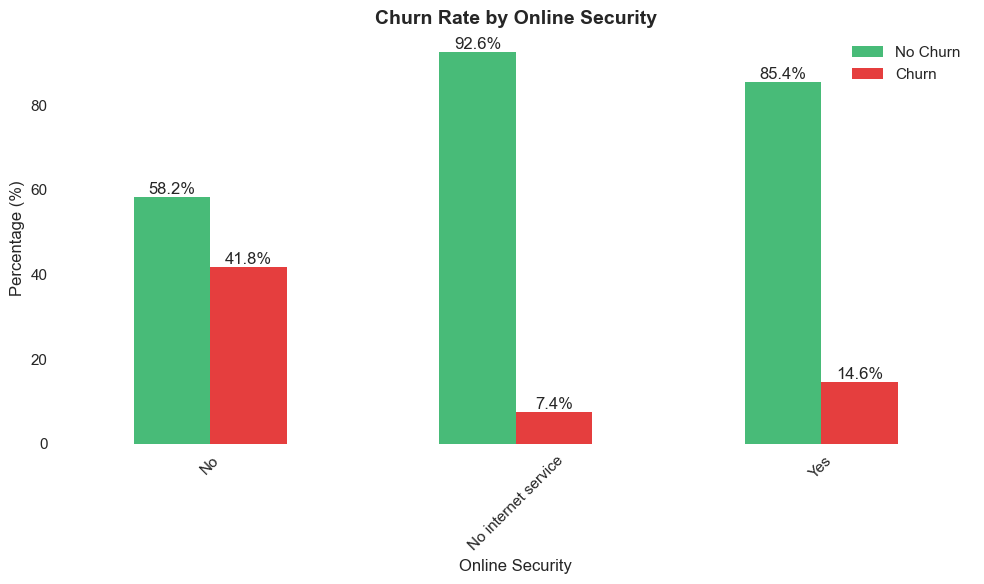

<Figure size 1000x600 with 0 Axes>

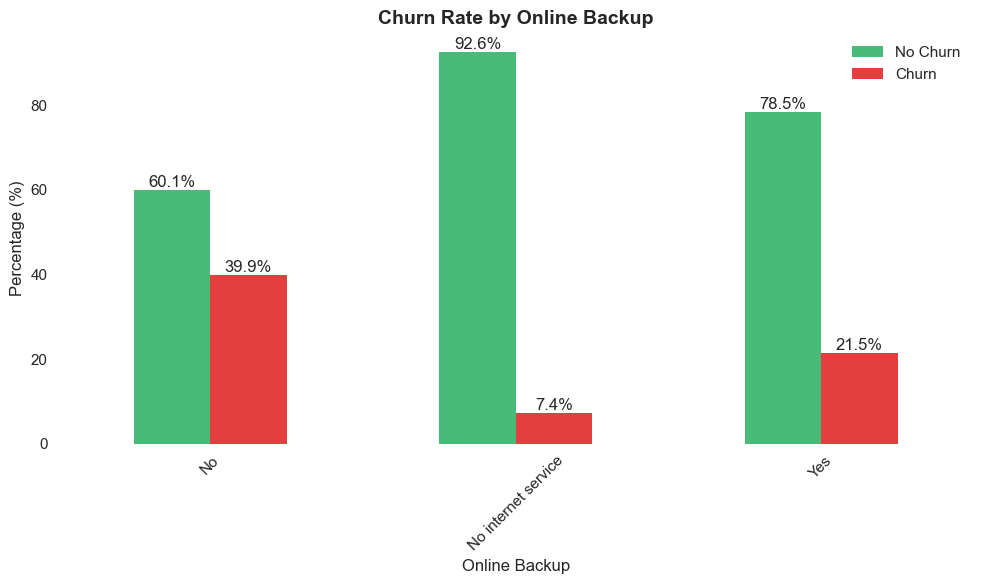

<Figure size 1000x600 with 0 Axes>

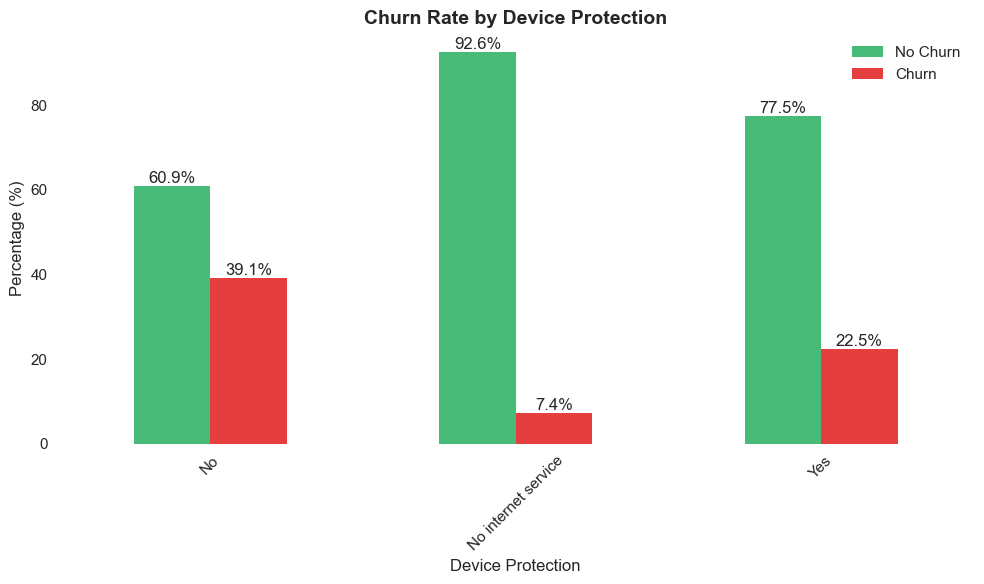

<Figure size 1000x600 with 0 Axes>

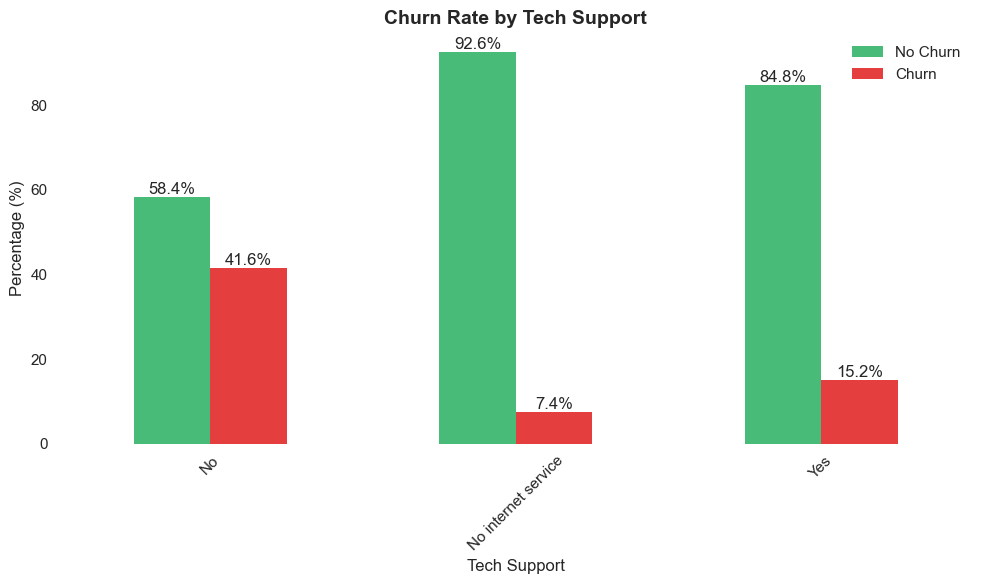

<Figure size 1000x600 with 0 Axes>

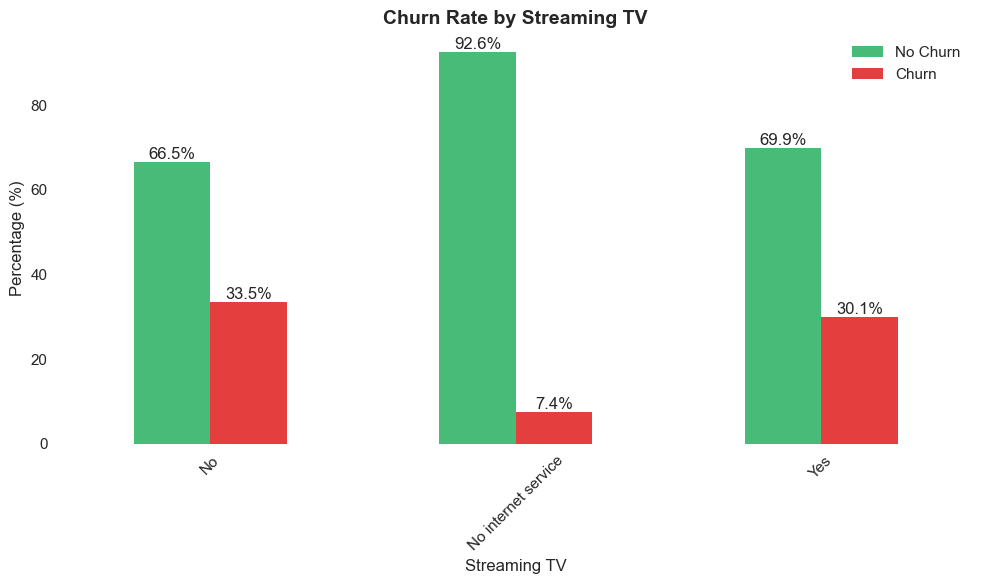

<Figure size 1000x600 with 0 Axes>

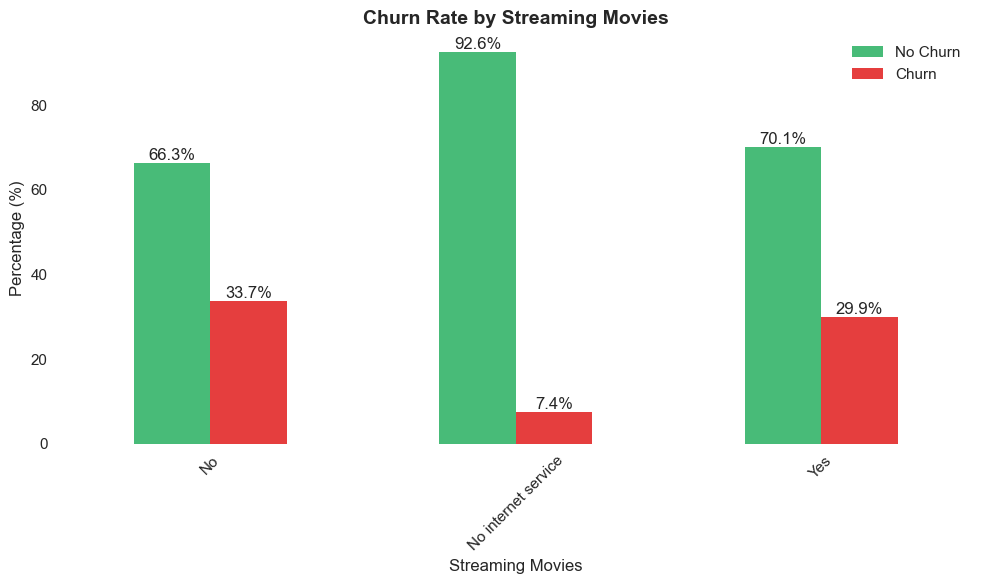


Churn rates by additional services:

Phone Service:
  No: 24.9%
  Yes: 26.7%

Dual:
  No: 25.0%
  No phone service: 24.9%
  Yes: 28.6%

Internet Service:
  DSL: 19.0%
  Fiber optic: 41.9%
  No: 7.4%

Online Security:
  No: 41.8%
  No internet service: 7.4%
  Yes: 14.6%

Online Backup:
  No: 39.9%
  No internet service: 7.4%
  Yes: 21.5%

Device Protection:
  No: 39.1%
  No internet service: 7.4%
  Yes: 22.5%

Tech Support:
  No: 41.6%
  No internet service: 7.4%
  Yes: 15.2%

Streaming TV:
  No: 33.5%
  No internet service: 7.4%
  Yes: 30.1%

Streaming Movies:
  No: 33.7%
  No internet service: 7.4%
  Yes: 29.9%


In [189]:
additional_services = ['Phone_Service','Dual','Internet_Service','Online_Security', 'Online_Backup', 'Device_Protection', 
                      'Tech_Support', 'Streaming_TV', 'Streaming_Movies']

for service in additional_services:

    service_churn = pd.crosstab(df[service], df['Churn'], normalize='index') * 100
    
    plt.figure(figsize=(10, 6))
    ax = service_churn.plot(kind='bar', color=[COLORS['retained'], COLORS['churned']], figsize=(10, 6))
    plt.title(f'Churn Rate by {service.replace("_", " ")}', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.xlabel(service.replace("_", " "))
    plt.legend(['No Churn', 'Churn'])
    plt.xticks(rotation=45)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')
    
    plt.tight_layout()
    plt.show()

print("\nChurn rates by additional services:")
for service in additional_services:
    print(f"\n{service.replace('_', ' ')}:")
    churn_by_service = df.groupby(service)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    for category, rate in churn_by_service.items():
        print(f"  {category}: {rate:.1f}%")

## 4. Contract and Billing Analysis


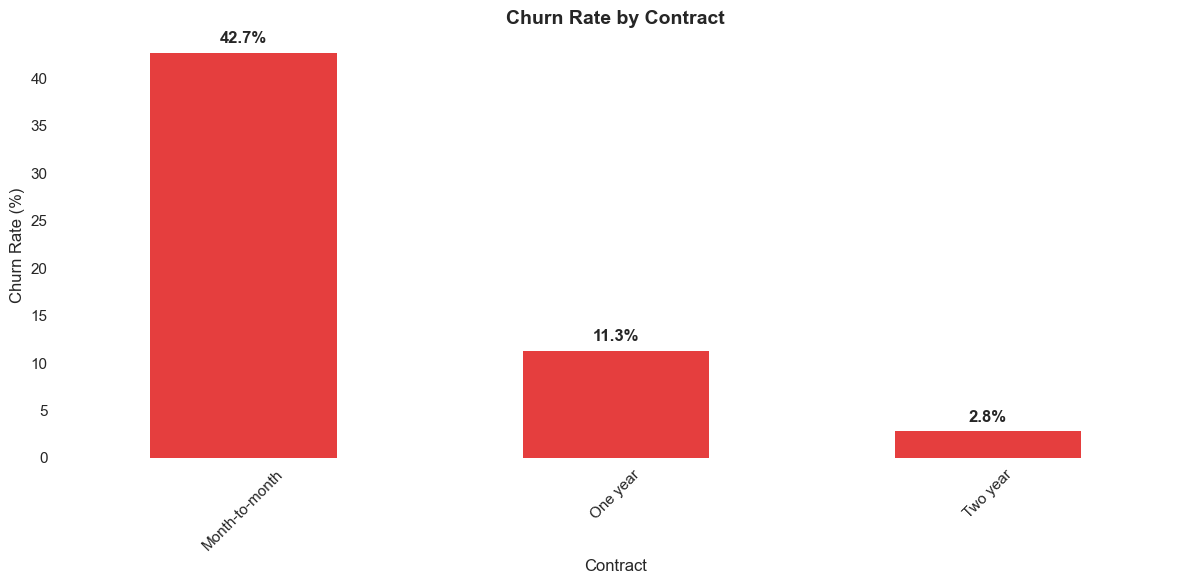

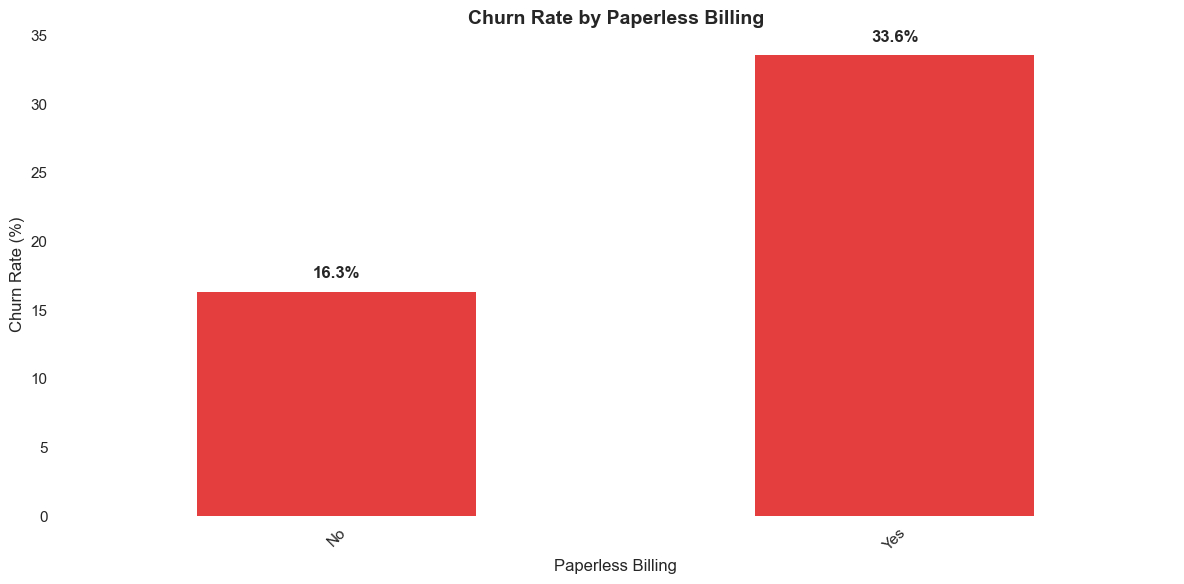

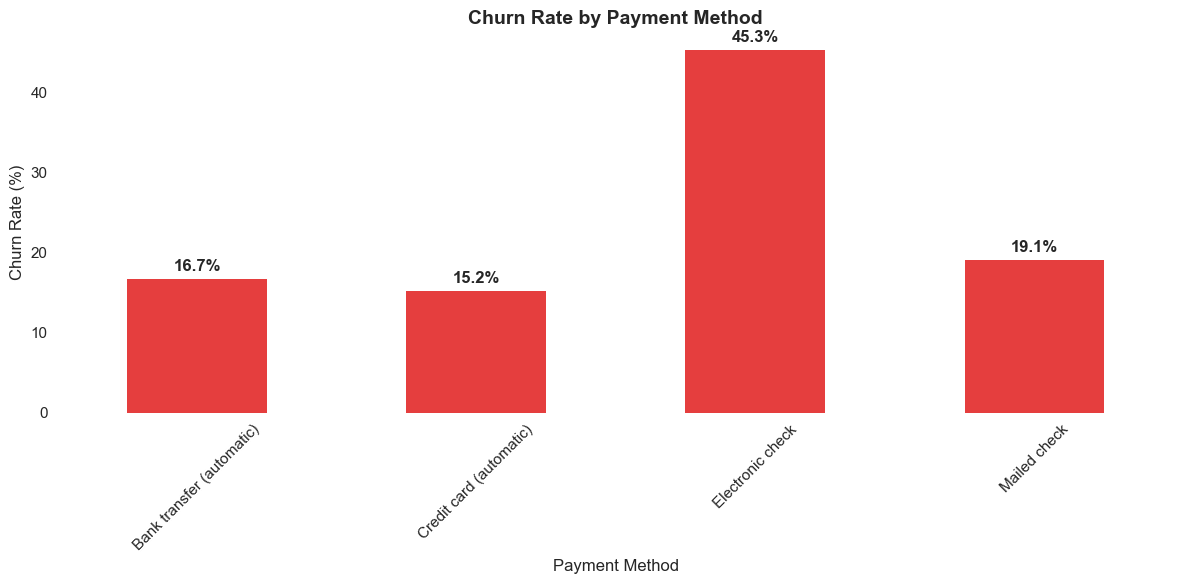


Detailed contract and billing statistics:

Contract:
  Month-to-month: 3,875 customers (55.0%) - Churn rate: 42.7%
  Two year: 1,695 customers (24.1%) - Churn rate: 2.8%
  One year: 1,473 customers (20.9%) - Churn rate: 11.3%

Paperless Billing:
  Yes: 4,171 customers (59.2%) - Churn rate: 33.6%
  No: 2,872 customers (40.8%) - Churn rate: 16.3%

Payment Method:
  Electronic check: 2,365 customers (33.6%) - Churn rate: 45.3%
  Mailed check: 1,612 customers (22.9%) - Churn rate: 19.1%
  Bank transfer (automatic): 1,544 customers (21.9%) - Churn rate: 16.7%
  Credit card (automatic): 1,522 customers (21.6%) - Churn rate: 15.2%


In [191]:
contract_billing_cols = ['Contract', 'Paperless_Billing', 'Payment_Method']

for col in contract_billing_cols:
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    
    plt.figure(figsize=(12, 6))
    ax = churn_rate.plot(kind='bar', color=COLORS['churned'], figsize=(12, 6))
    plt.title(f'Churn Rate by {col.replace("_", " ")}', fontsize=14, fontweight='bold')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col.replace("_", " "))
    plt.xticks(rotation=45)
    
    for i, v in enumerate(churn_rate.values):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("\nDetailed contract and billing statistics:")
for col in contract_billing_cols:
    print(f"\n{col.replace('_', ' ')}:")
    value_counts = df[col].value_counts()
    churn_rates = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    
    for category in value_counts.index:
        count = value_counts[category]
        pct_total = count / len(df) * 100
        churn_rate = churn_rates[category]
        print(f"  {category}: {count:,} customers ({pct_total:.1f}%) - Churn rate: {churn_rate:.1f}%")

## 5. Financial Analysis


Tenure Statistics:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


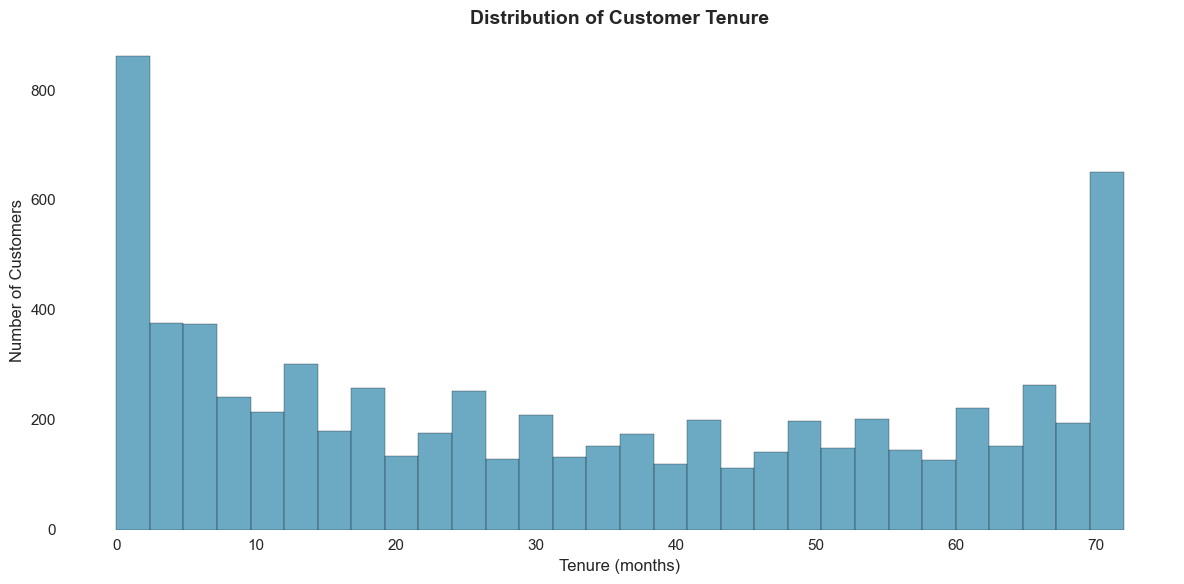

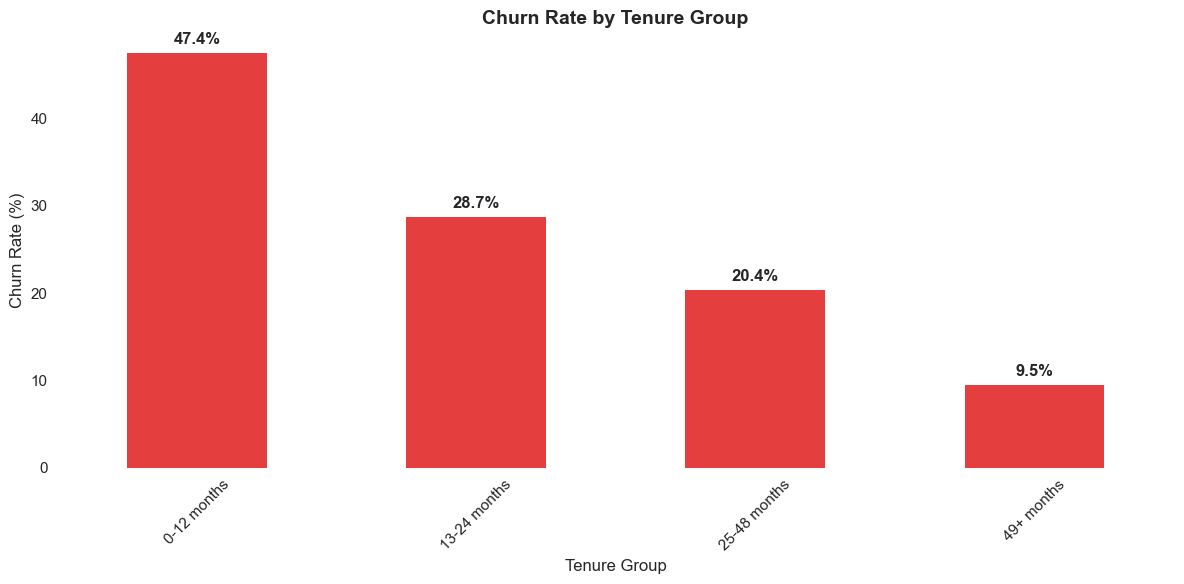

In [192]:
print("Tenure Statistics:")
print(df['tenure'].describe())

df['tenure_group'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 48, 72], 
                           labels=['0-12 months', '13-24 months', '25-48 months', '49+ months'],
                           include_lowest=True)

plt.figure(figsize=(12, 6))
df['tenure'].hist(bins=30, color=COLORS['primary'], edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Tenure', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

tenure_churn = df.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
plt.figure(figsize=(12, 6))
ax = tenure_churn.plot(kind='bar', color=COLORS['churned'], figsize=(12, 6))
plt.title('Churn Rate by Tenure Group', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
plt.xticks(rotation=45)

for i, v in enumerate(tenure_churn.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Feature Engineering


### 6.1 Billing-based features


In [193]:
# Average charges per montth
df['Average_Charges'] = df['Total_Charges'] / (df['tenure'] + 1)

# Charge to tenure ratio (spending intensity)
df['Charge_to_Tenure_Ratio'] = df['Monthly_Charges'] / (df['tenure'] + 1)

### 6.2 Tenure-Based features


In [194]:
# Customer lifecycle flags
df['Is_New_Customer'] = (df['tenure'] < 6).astype(int)
df['Is_Long_Term'] = (df['tenure'] > 24).astype(int)

### 6.3 Contract & Payment features


In [195]:
# Automatic payment flag
auto_pay_methods = ['Credit card (automatic)', 'Bank transfer (automatic)']
df['AutoPay'] = df['Payment_Method'].isin(auto_pay_methods).astype(int)

# High-risk combination: Paperless + Month-to-month
df['Is_Paperless_and_Monthly'] = ((df['Paperless_Billing'] == 'Yes') & 
                                          (df['Contract'] == 'Month-to-month')).astype(int)

# Contract length in months
contract_mapping = {'Month-to-month': 1, 'One year': 12, 'Two year': 24}
df['Contract_Length'] = df['Contract'].map(contract_mapping)

# Payment method grouping
df['Payment_Method_Grouped'] = df['Payment_Method'].apply(
    lambda x: 'Electronic_Check' if x == 'Electronic check' else 'Other')

### 6.4 Service bundling features


In [ ]:
# Internet service flag
df['Has_Internet'] = (df['Internet_Service'] != 'No').astype(int)

# Entertainment package (streaming services)
df['Entertainment_Package'] = ((df['Streaming_TV'] == 'Yes') | 
                                       (df['Streaming_Movies'] == 'Yes')).astype(int)

# Security package
security_services = ['Online_Security', 'Tech_Support', 'Device_Protection']
df['Security_Package'] = df[security_services].apply(
    lambda row: sum(val == 'Yes' for val in row), axis=1)


# count number of services per customer
service_columns = ['Phone_Service','Internet_Service','Online_Security', 'Online_Backup', 'Device_Protection', 
                  'Tech_Support', 'Streaming_TV', 'Streaming_Movies']

df['num_services'] = df[service_columns].apply(
    lambda row: sum("No" not in str(val) for val in row), axis=1
    )

### 6.5 Interaction features


In [197]:
# Contract type × Monthly charges interaction
df['Contract_Charges_Interaction'] = df['Contract_Length'] * df['Monthly_Charges']

# Tenure × Services count (engagement score)
df['Engagement_Score'] = df['tenure'] * df['num_services']

# Payment risk score (electronic check + paperless)
df['Payment_Risk_Score'] = ((df['Payment_Method'] == 'Electronic check').astype(int) + 
                                    (df['Paperless_Billing'] == 'Yes').astype(int))

# Month-to-month + Fiber optic: 2,128 customers, 54.6% churn rate
# New customers + Electronic check: 934 customers, 63.1% churn rate
# No additional services: 1,267 customers, 56.7% churn rate

## 7. Revenue impact analysis


In [198]:
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
retained_customers = len(df[df['Churn'] == 'No'])

avg_monthly_churned = df[df['Churn'] == 'Yes']['Monthly_Charges'].mean()
avg_monthly_retained = df[df['Churn'] == 'No']['Monthly_Charges'].mean()

total_revenue_lost = df[df['Churn'] == 'Yes']['Total_Charges'].sum()
potential_monthly_loss = df[df['Churn'] == 'Yes']['Monthly_Charges'].sum()

print(f"Total customers: {total_customers:,}")
print(f"Churned customers: {churned_customers:,} ({churned_customers/total_customers*100:.1f}%)")
print(f"Retained customers: {retained_customers:,} ({retained_customers/total_customers*100:.1f}%)")
print(f"\nAverage monthly charges - Churned: ${avg_monthly_churned:.2f}")
print(f"Average monthly charges - Retained: ${avg_monthly_retained:.2f}")
print(f"\nTotal revenue from churned customers: ${total_revenue_lost:,.2f}")
print(f"Monthly revenue loss from churn: ${potential_monthly_loss:,.2f}")
print(f"Annualized revenue loss: ${potential_monthly_loss * 12:,.2f}")

Total customers: 7,043
Churned customers: 1,869 (26.5%)
Retained customers: 5,174 (73.5%)

Average monthly charges - Churned: $74.44
Average monthly charges - Retained: $61.27

Total revenue from churned customers: $2,862,926.90
Monthly revenue loss from churn: $139,130.85
Annualized revenue loss: $1,669,570.20


## 8. Correlation Analysis


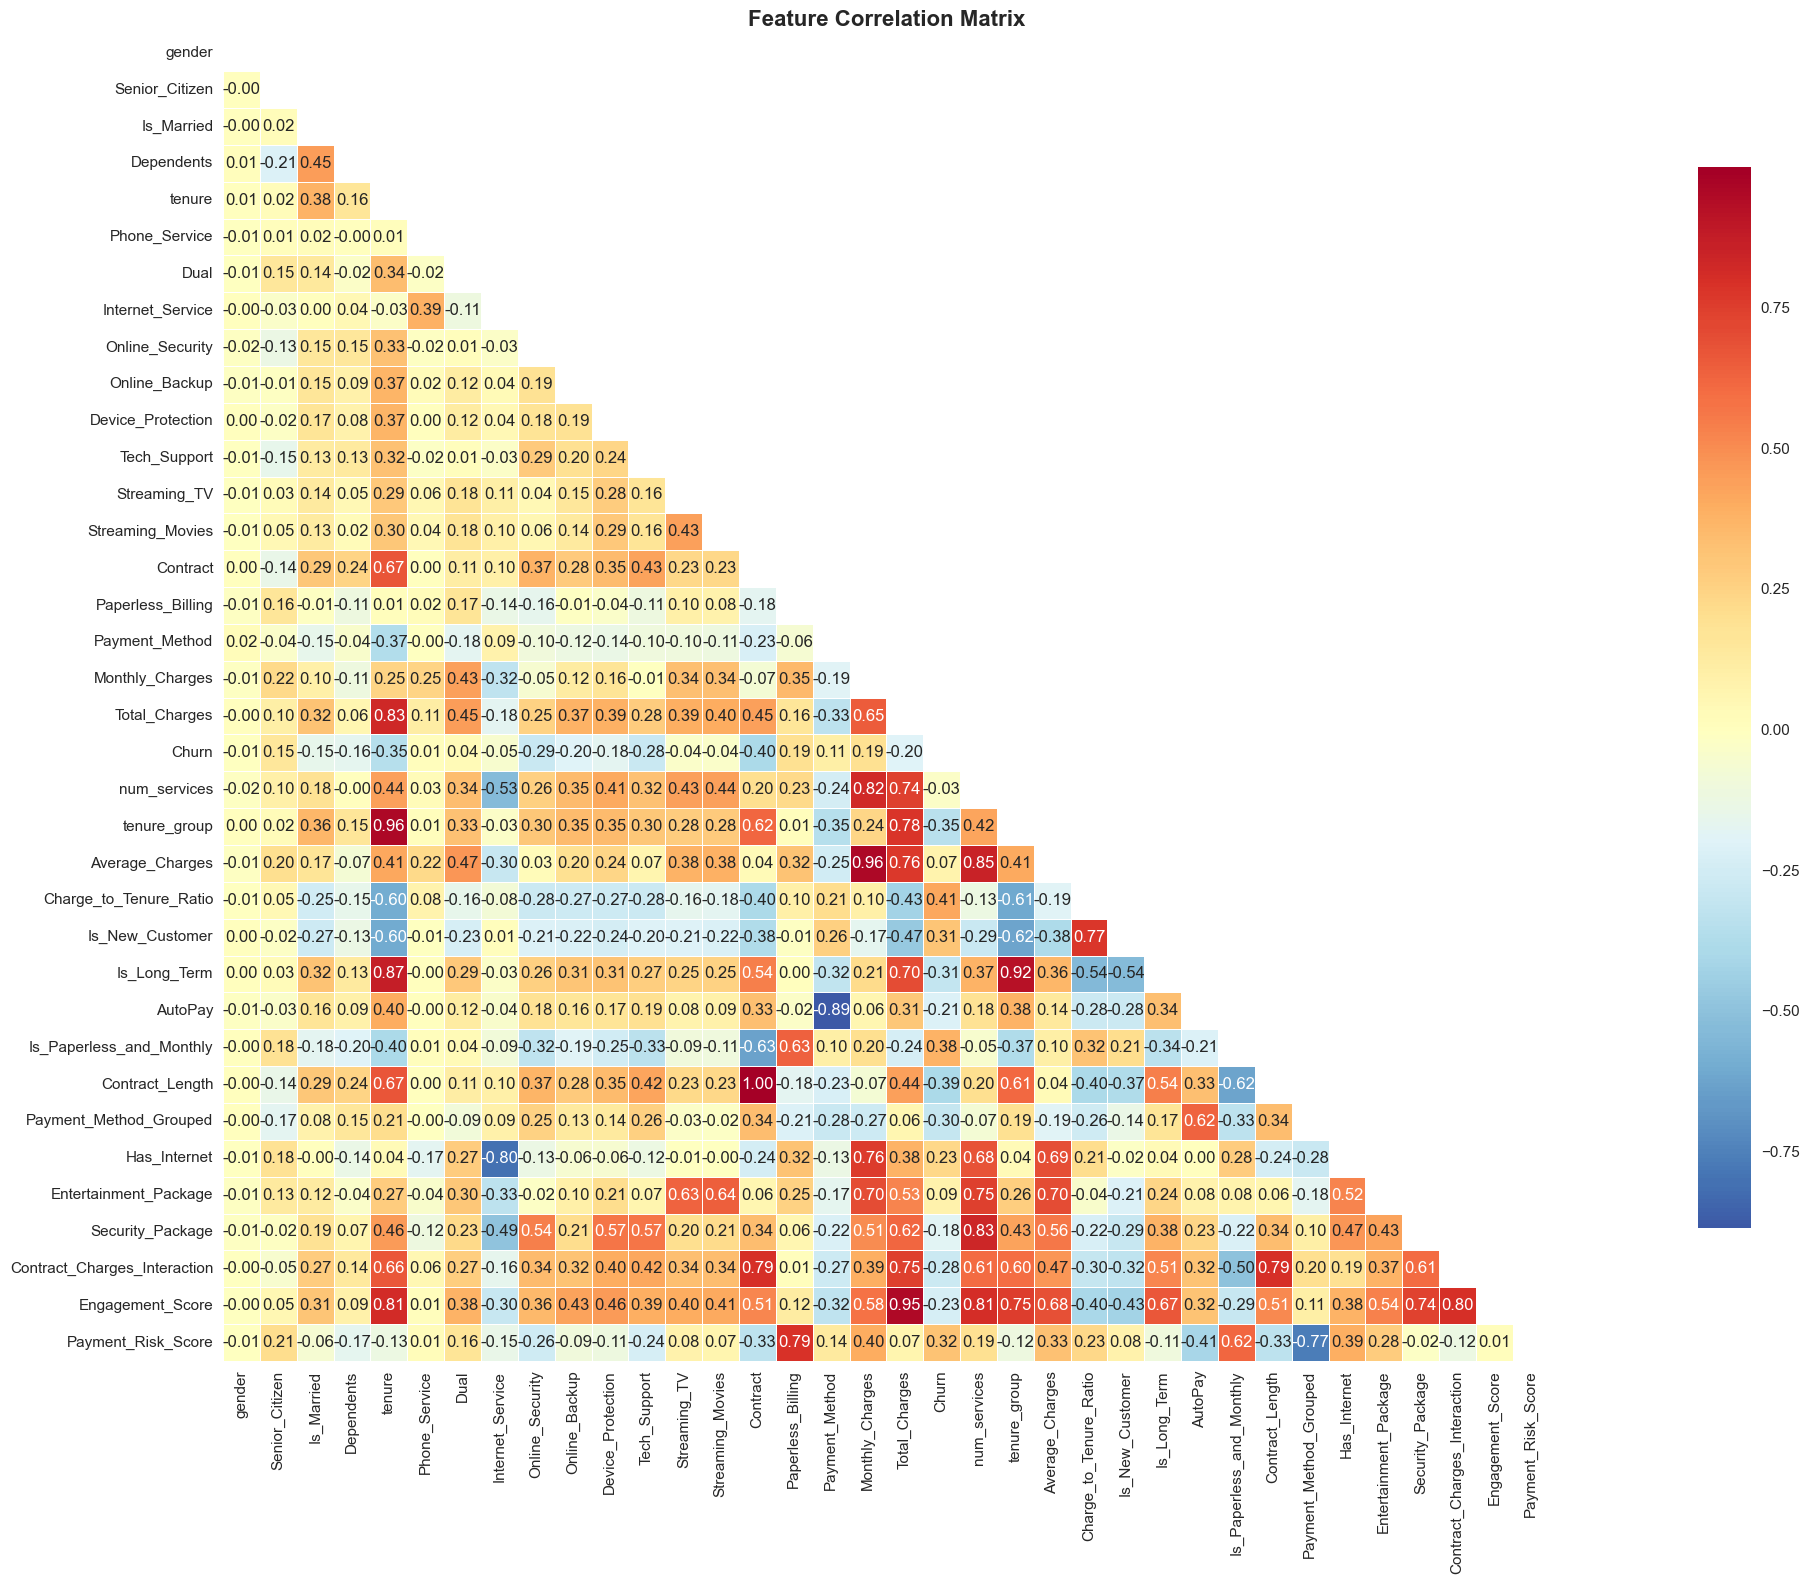


Features most correlated with Churn:
Charge_to_Tenure_Ratio: 0.412
Contract: 0.397
Contract_Length: 0.394
Is_Paperless_and_Monthly: 0.375
tenure: 0.352
tenure_group: 0.345
Payment_Risk_Score: 0.316
Is_Long_Term: 0.309
Is_New_Customer: 0.309
Payment_Method_Grouped: 0.302
Online_Security: 0.289
Tech_Support: 0.282
Contract_Charges_Interaction: 0.281
Engagement_Score: 0.232
Has_Internet: 0.228
AutoPay: 0.210
Total_Charges: 0.198
Online_Backup: 0.196
Monthly_Charges: 0.193
Paperless_Billing: 0.192
Security_Package: 0.180
Device_Protection: 0.178
Dependents: 0.164
Senior_Citizen: 0.151
Is_Married: 0.150
Payment_Method: 0.107
Entertainment_Package: 0.085
Average_Charges: 0.073
Internet_Service: 0.047
Streaming_Movies: 0.038
Dual: 0.038
Streaming_TV: 0.037
num_services: 0.031
Phone_Service: 0.012
gender: 0.009


In [199]:
df_encoded = df.copy()

categorical_columns = df_encoded.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    if col not in ['customerID', 'tenure_group']:
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Handle tenure_group separately (convert category to numeric)
if 'tenure_group' in df_encoded.columns:
    df_encoded['tenure_group'] = df_encoded['tenure_group'].cat.codes

# Calculate correlation matrix
correlation_matrix = df_encoded.drop('customerID', axis=1).corr()

plt.figure(figsize=(30, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

churn_correlations = correlation_matrix['Churn'].abs().sort_values(ascending=False)
print("\nFeatures most correlated with Churn:")
for feature, corr in churn_correlations.items():
    if feature != 'Churn':
        print(f"{feature}: {corr:.3f}")

gender: Chi2=0.48, p-value=0.4866 (not significant), Phi=0.0083
Is_Married: Chi2=158.73, p-value=0.0000 (significant), Phi=0.1501
Dependents: Chi2=189.13, p-value=0.0000 (significant), Phi=0.1639
Phone_Service: Chi2=0.92, p-value=0.3388 (not significant), Phi=0.0114
Dual: Chi2=11.33, p-value=0.0035 (significant), Phi=0.0401
Internet_Service: Chi2=732.31, p-value=0.0000 (significant), Phi=0.3225
Online_Security: Chi2=850.00, p-value=0.0000 (significant), Phi=0.3474
Online_Backup: Chi2=601.81, p-value=0.0000 (significant), Phi=0.2923
Device_Protection: Chi2=558.42, p-value=0.0000 (significant), Phi=0.2816
Tech_Support: Chi2=828.20, p-value=0.0000 (significant), Phi=0.3429
Streaming_TV: Chi2=374.20, p-value=0.0000 (significant), Phi=0.2305
Streaming_Movies: Chi2=375.66, p-value=0.0000 (significant), Phi=0.2310
Contract: Chi2=1184.60, p-value=0.0000 (significant), Phi=0.4101
Paperless_Billing: Chi2=258.28, p-value=0.0000 (significant), Phi=0.1915
Payment_Method: Chi2=648.14, p-value=0.0000

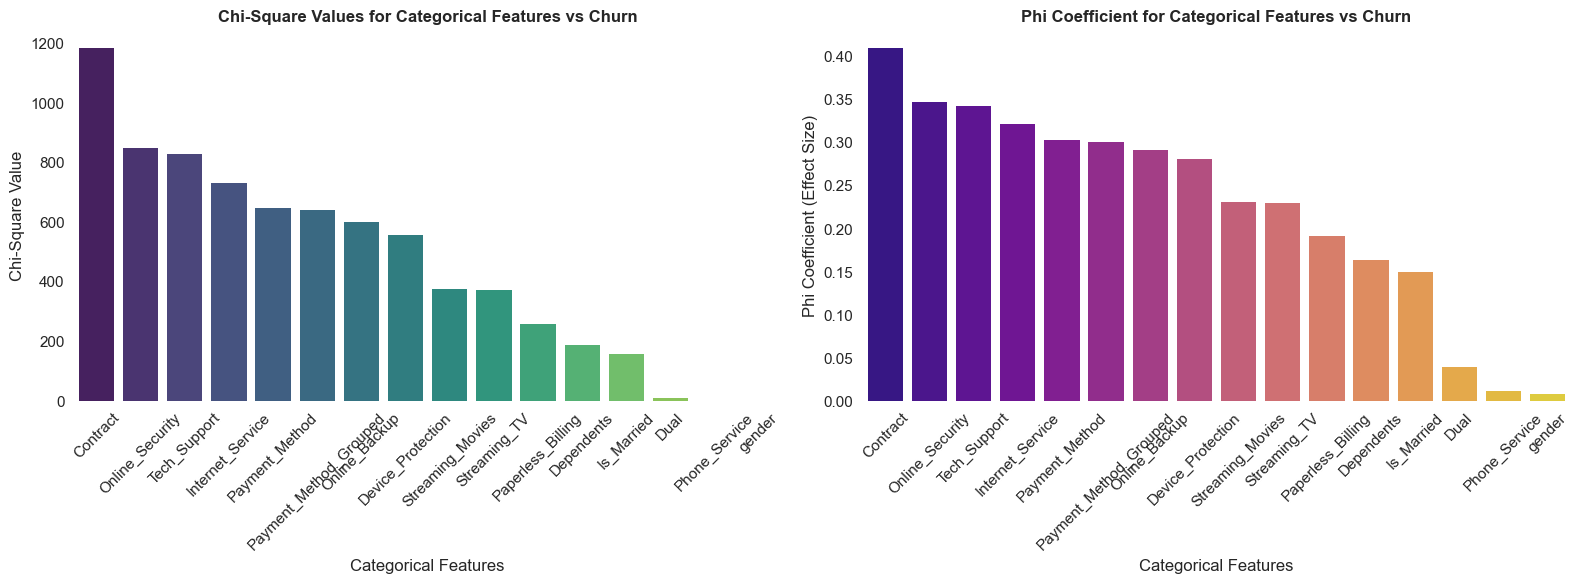


Strongest associations with Churn (by Phi coefficient):
Contract: 0.4101 (Strong)
Online_Security: 0.3474 (Strong)
Tech_Support: 0.3429 (Strong)
Internet_Service: 0.3225 (Strong)
Payment_Method: 0.3034 (Strong)
Payment_Method_Grouped: 0.3016 (Strong)
Online_Backup: 0.2923 (Medium)
Device_Protection: 0.2816 (Medium)
Streaming_Movies: 0.2310 (Medium)
Streaming_TV: 0.2305 (Medium)
Paperless_Billing: 0.1915 (Medium)
Dependents: 0.1639 (Medium)
Is_Married: 0.1501 (Medium)
Dual: 0.0401 (Weak)
Phone_Service: 0.0114 (Weak)
gender: 0.0083 (Weak)


In [200]:
categorical_cols = df.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn'])
chi2_results = {}
phi_results = {}

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Calculate Phi coefficient (Cramér's V for tables larger than 2x2)
    n = contingency_table.sum().sum()
    phi = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    if p < 0.05:
        print(f"{col}: Chi2={chi2:.2f}, p-value={p:.4f} (significant), Phi={phi:.4f}")
    else:
        print(f"{col}: Chi2={chi2:.2f}, p-value={p:.4f} (not significant), Phi={phi:.4f}") 
    
    chi2_results[col] = chi2
    phi_results[col] = phi

# Create visualization for both Chi-square and Phi coefficient
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chi-square plot
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['Chi2']).sort_values(by='Chi2', ascending=False)
sns.barplot(x=chi2_df.index, y='Chi2', data=chi2_df, palette='viridis', ax=ax1)
ax1.set_title('Chi-Square Values for Categorical Features vs Churn', fontsize=12, fontweight='bold')
ax1.set_ylabel('Chi-Square Value')
ax1.set_xlabel('Categorical Features')
ax1.tick_params(axis='x', rotation=45)

# Phi coefficient plot
phi_df = pd.DataFrame.from_dict(phi_results, orient='index', columns=['Phi']).sort_values(by='Phi', ascending=False)
sns.barplot(x=phi_df.index, y='Phi', data=phi_df, palette='plasma', ax=ax2)
ax2.set_title('Phi Coefficient for Categorical Features vs Churn', fontsize=12, fontweight='bold')
ax2.set_ylabel('Phi Coefficient (Effect Size)')
ax2.set_xlabel('Categorical Features')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary of strongest associations
print(f"\nStrongest associations with Churn (by Phi coefficient):")
phi_df_sorted = phi_df.sort_values(by='Phi', ascending=False)
for feature, phi_val in phi_df_sorted.iterrows():
    effect_size = "Strong" if phi_val['Phi'] > 0.3 else "Medium" if phi_val['Phi'] > 0.1 else "Weak"
    print(f"{feature}: {phi_val['Phi']:.4f} ({effect_size})")